# Data Cleaning And Data Wrangling

##### New York City TLC Trip Record Data Dictionary

| Feature               | Description                                                                                      |
|-----------------------|--------------------------------------------------------------------------------------------------|
| VendorID              | A code indicating the LPEP provider that provided the record.                                    |
|                       | 1 = Creative Mobile Technologies, LLC.                                                          |
|                       | 2 = VeriFone Inc.                                                                               |
| lpep_pickup_datetime  | The date and time when the meter was engaged.                                                    |
| lpep_dropoff_datetime | The date and time when the meter was disengaged.                                                 |
| Passenger_count       | The number of passengers in the vehicle (driver-entered value).                                  |
| Trip_distance         | The elapsed trip distance in miles reported by the taximeter.                                     |
| PULocationID          | TLC Taxi Zone in which the taximeter was engaged.                                                 |
| DOLocationID          | TLC Taxi Zone in which the taximeter was disengaged.                                              |
| RateCodeID            | The final rate code in effect at the end of the trip.                                              |
|                       | 1 = Standard rate                                                                                |
|                       | 2 = JFK                                                                                          |
|                       | 3 = Newark                                                                                       |
|                       | 4 = Nassau or Westchester                                                                        |
|                       | 5 = Negotiated fare                                                                               |
|                       | 6 = Group ride                                                                                   |
| Store_and_fwd_flag    | Indicates whether the trip record was held in the vehicle memory before sending to the vendor.   |
|                       | Y = store and forward trip                                                                       |
|                       | N = not a store and forward trip                                                                 |
| Payment_type          | A numeric code signifying how the passenger paid for the trip.                                     |
|                       | 1 = Credit card                                                                                  |
|                       | 2 = Cash                                                                                         |
|                       | 3 = No charge                                                                                    |
|                       | 4 = Dispute                                                                                      |
|                       | 5 = Unknown                                                                                      |
|                       | 6 = Voided trip                                                                                  |
| Fare_amount           | The time-and-distance fare calculated by the meter, including extra miscellaneous extras.         |
| MTA_tax               | $0.50 MTA tax triggered based on the metered rate in use.                                         |
| Improvement_surcharge | $0.30 improvement surcharge assessed on hailed trips at the flag drop (began in 2015).           |
| Tip_amount            | Automatically populated for credit card tips; cash tips not included.                              |
| Tolls_amount          | The total amount of all tolls paid in the trip.                                                    |
| Total_amount          | The total amount charged to passengers, excluding cash tips.                                       |
| Trip_type             | A code indicating whether the trip was a street hail or a dispatch.                                |
|                       | 1 = Street-hail                                                                                  |
|                       | 2 = Dispatch                                                                                     |


## 

## Load the libraries

In [730]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import re


Import library yang akan digunakan untuk melakukan data cleaning, data wrangling, dan data visualization.


## Load the dataset

Pada project ini menggunakan dataset yang berisi data perjalanan taksi di New York City pada bulan Januari 2023 dan dataset pendukung yang berisi informasi mengenai lokasi dan zona di New York City. Dataset tersebut berasal dari Purwadhika Data Science Class dan https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page. 

In [731]:
df = pd.read_csv('NYC TLC Trip Record.csv')
df1 = pd.read_csv('taxi_zones_lookups.csv')
df.head()
# df1.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


detail data pada taxi_zone_lookup.csv mempunyai informasi sebagai berikut:

| Feature       | Description                                                                                      |
|---------------|--------------------------------------------------------------------------------------------------|
| LocationID    | TLC Taxi Zone Code                                                                               |
| Borough       | The borough in which the taxi zone is located.                                                   |
| Zone          | The name of the taxi zone.                                                                       |
| service_zone  | The current service zone of the taxi zone.                                                       |


In [732]:
df1.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


Mencari Informasi apakah dataset zone_lookup.csv dan trip_record.csv mempunyai informasi yang sama dengan cara mencheck informasi dari kedua dataset tersebut.

In [733]:
#max location id
locMax = df['PULocationID'].max()
doMax = df['DOLocationID'].max()
locationIDMax = df1['LocationID'].max()
print('Maksimum PULocationID: ', locMax)
print('Maksimum DOLocationID: ', doMax)
print('Maksimum LocationID: ', locationIDMax)

Maksimum PULocationID:  265
Maksimum DOLocationID:  265
Maksimum LocationID:  265


In [734]:
#cek apakah df1 dan df2 memiliki location id yang sama
locID1 = df['PULocationID'].unique()
locID2 = df['DOLocationID'].unique()
locID3 = df1['LocationID'].unique()

#validating location id in df
for i in locID1:
    if i not in locID3:
        print('Location ID in df1 not in df2: ', i)
    else:
        pass
for i in locID2:
    if i not in locID3:
        print('Location ID in df2 not in df1: ', i)
    else:
        pass
    

Pada kode diatas dilakukan perulangan untuk memvalidasi apakah dataset nyc_TLC_trip_record dan dataset taxi_zone_lookup memiliki informasi yang sama. dan setelah dicek maksimal PULocationID dan DOLocationID adalah 265 dan 265. dan setelah dicek maksimal LocationID adalah 265. Sehingga dapat disimpulkan bahwa dataset nyc_TLC_trip_record dan dataset taxi_zone_lookup memiliki informasi yang sama.

In [735]:
#merge the two dataframes on location id based PULocationID and DOLocationID
for i, row in df1.iterrows():
    df.loc[df['PULocationID'] == row['LocationID'], 'PUBorough'] = row['Borough']
    df.loc[df['DOLocationID'] == row['LocationID'], 'DOBorough'] = row['Borough']
    df.loc[df['PULocationID'] == row['LocationID'], 'PUZone'] = row['Zone']
    df.loc[df['DOLocationID'] == row['LocationID'], 'DOZone'] = row['Zone']
    df.loc[df['PULocationID'] == row['LocationID'], 'PUservice_zone'] = row['service_zone']
    df.loc[df['DOLocationID'] == row['LocationID'], 'DOservice_zone'] = row['service_zone']

df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,DOBorough,PUZone,DOZone,PUservice_zone,DOservice_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,24.18,1.0,1.0,2.75,Manhattan,Manhattan,Morningside Heights,Lincoln Square West,Boro Zone,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,15.84,1.0,1.0,0.00,Manhattan,Manhattan,Bloomingdale,Central Park,Yellow Zone,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,11.64,1.0,1.0,0.00,Queens,Queens,Steinway,Old Astoria,Boro Zone,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,10.20,1.0,1.0,0.00,Manhattan,Manhattan,Central Harlem,Upper West Side North,Boro Zone,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,8.00,1.0,1.0,0.00,Manhattan,Manhattan,Central Harlem,East Harlem North,Boro Zone,Boro Zone


In [736]:
df1.tail()

,LocationID,Borough,Zone,service_zone
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN
264,265,Unknown,NaN,NaN


In [737]:
df1['Zone'].unique()

array(['Newark Airport', 'Jamaica Bay', 'Allerton/Pelham Gardens',
       'Alphabet City', 'Arden Heights', 'Arrochar/Fort Wadsworth',
       'Astoria', 'Astoria Park', 'Auburndale', 'Baisley Park',
       'Bath Beach', 'Battery Park', 'Battery Park City', 'Bay Ridge',
       'Bay Terrace/Fort Totten', 'Bayside', 'Bedford', 'Bedford Park',
       'Bellerose', 'Belmont', 'Bensonhurst East', 'Bensonhurst West',
       'Bloomfield/Emerson Hill', 'Bloomingdale', 'Boerum Hill',
       'Borough Park', 'Breezy Point/Fort Tilden/Riis Beach',
       'Briarwood/Jamaica Hills', 'Brighton Beach', 'Broad Channel',
       'Bronx Park', 'Bronxdale', 'Brooklyn Heights',
       'Brooklyn Navy Yard', 'Brownsville', 'Bushwick North',
       'Bushwick South', 'Cambria Heights', 'Canarsie', 'Carroll Gardens',
       'Central Harlem', 'Central Harlem North', 'Central Park',
       'Charleston/Tottenville', 'Chinatown', 'City Island',
       'Claremont/Bathgate', 'Clinton East', 'Clinton Hill',
       'Clint

In [738]:
# drop pu and do location id where 264 and 265
df = df.drop(df[df['PULocationID'].isin([264, 265])].index)
df = df.drop(df[df['DOLocationID'].isin([264, 265])].index)


Berdasarkan informasi diatas maka location id 264 dan 265 akan di drop karena tidak ada informasi mengenai lokasi tersebut pada dataset taxi_zone_lookup.

In [739]:
#rearrange columns
# df = df[['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'PUBorough', 'PUZone', 'PUservice_zone', 'DOLocationID', 'DOBorough', 'DOZone', 'DOservice_zone', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']]
# df.head()

In [740]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67499 entries, 0 to 68210
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               67499 non-null  int64  
 1   lpep_pickup_datetime   67499 non-null  object 
 2   lpep_dropoff_datetime  67499 non-null  object 
 3   store_and_fwd_flag     63195 non-null  object 
 4   RatecodeID             63195 non-null  float64
 5   PULocationID           67499 non-null  int64  
 6   DOLocationID           67499 non-null  int64  
 7   passenger_count        63195 non-null  float64
 8   trip_distance          67499 non-null  float64
 9   fare_amount            67499 non-null  float64
 10  extra                  67499 non-null  float64
 11  mta_tax                67499 non-null  float64
 12  tip_amount             67499 non-null  float64
 13  tolls_amount           67499 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  improve

## Skimming the dataset

In [741]:
display(pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value(%)': df.isna().sum().values / len(df) * 100,
    'null_value': df.isna().sum().values,
    'neg_value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    '0_value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'duplicate' : df.duplicated().sum(),
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]}
).round(3))
# ,df.describe().round(2), df.describe(include='object'))


,feature,data_type,null_value(%),null_value,neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,VendorID,int64,0.000,0,0.000,0.000,0,2,"[2, 1]"
1,lpep_pickup_datetime,object,0.000,0,0.000,0.000,0,65903,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,object,0.000,0,0.000,0.000,0,65838,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,object,6.376,4304,0.000,0.000,0,2,"[N, Y, nan]"
4,RatecodeID,float64,6.376,4304,0.000,0.000,0,6,"[1.0, 5.0, 3.0, 2.0, 99.0, 4.0, nan]"
5,PULocationID,int64,0.000,0,0.000,0.000,0,222,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,int64,0.000,0,0.000,0.000,0,247,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,float64,6.376,4304,0.000,0.477,0,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 8.0, 7.0, ..."
8,trip_distance,float64,0.000,0,0.000,4.433,0,1801,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
9,fare_amount,float64,0.000,0,0.252,0.110,0,2504,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


<b> Insight Anomali Data </b>
- lpep_pickup_datetime dan lpep_dropoff_datetime harus diubah menjadi tipe data datetime karena masih berbentuk object.
- ehail_fee tidak memiliki informasi sehingga dapat dihapus.
- fare_amount, tip_amount, tolls_amount, total_amount, dan improvement_surcharge memiliki nilai negatif sehingga perlu diperiksa lebih lanjut.
- ratecodeID memiliki nilai 99 yang tidak ada dalam data dictionary sehingga perlu diperiksa lebih lanjut.
- trip_distance memiliki nilai 0 sehingga perlu diperiksa lebih lanjut.
- trip_type memiliki nilai 3 yaitu nan yang tidak ada dalam data dictionary sehingga perlu diperiksa lebih lanjut.



<b> Insight Missing Value </b>
- PULocationID dan DOLocationID memiliki 0 missing value.
- ratecodeID memiliki 6.339% missing value.
- passenger_count memiliki 6.339% missing value.
- payment_type memiliki 6.339% missing value.
- trip_type memiliki 6.354% missing value.
- congestion_surcharge memiliki 6.339% missing value.

## Data Distribution

In [742]:
display(df.describe().round(2)
,df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,67499.00,63195.0,67499.00,67499.00,63195.00,67499.00,67499.00,67499.00,67499.00,67499.00,67499.00,0.0,67499.00,67499.00,63195.00,63186.00,63195.00
mean,1.86,1.1,97.95,137.22,1.32,8.15,16.40,0.83,0.59,2.13,0.16,NaN,0.95,21.59,1.37,1.02,0.73
std,0.34,1.3,60.58,76.09,0.98,588.18,12.74,1.27,0.38,2.98,1.06,NaN,0.20,14.75,0.51,0.13,1.22
min,1.00,1.0,3.00,1.00,0.00,0.00,-70.00,-2.50,-0.50,-10.50,0.00,NaN,-1.00,-71.50,1.00,1.00,-2.75
25%,2.00,1.0,74.00,74.00,1.00,1.13,9.30,0.00,0.50,0.00,0.00,NaN,1.00,12.90,1.00,1.00,0.00
50%,2.00,1.0,75.00,138.00,1.00,1.85,13.30,0.00,0.50,1.60,0.00,NaN,1.00,17.85,1.00,1.00,0.00
75%,2.00,1.0,129.00,216.00,1.00,3.20,19.80,1.00,0.50,3.33,0.00,NaN,1.00,26.04,2.00,1.00,2.75
max,2.00,99.0,263.00,263.00,9.00,120098.84,490.00,7.50,2.75,222.22,36.05,NaN,1.00,491.00,5.00,2.00,2.75


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,PUBorough,DOBorough,PUZone,DOZone,PUservice_zone,DOservice_zone
count,67499,67499,63195,67499,67499,67499,67499,67499,67499
unique,65903,65838,2,5,6,221,246,3,4
top,2023-01-07 23:58:06,2023-01-09 00:00:00,N,Manhattan,Manhattan,East Harlem North,East Harlem South,Boro Zone,Boro Zone
freq,4,6,62913,39308,39616,13224,3524,63516,43563


<b>Insight Descriptive Statistics</b>
- PULocationID memiliki nilai minimum 3 dan nilai maksimum 265.'
- DOLocationID memiliki nilai minimum 1 dan nilai maksimum 265.'
- passenger_count memiliki nilai minimum 0 dan nilai maksimum 9., sehingga perlu diperiksa lebih lanjut.'
- trip_distance memiliki nilai minimum 0 dan nilai maksimum 603.10.'
- fare_amount memiliki nilai minimum -70 dan nilai maksimum 490.'
- extra memiliki nilai minimum -60 dan nilai maksimum 4.5.'

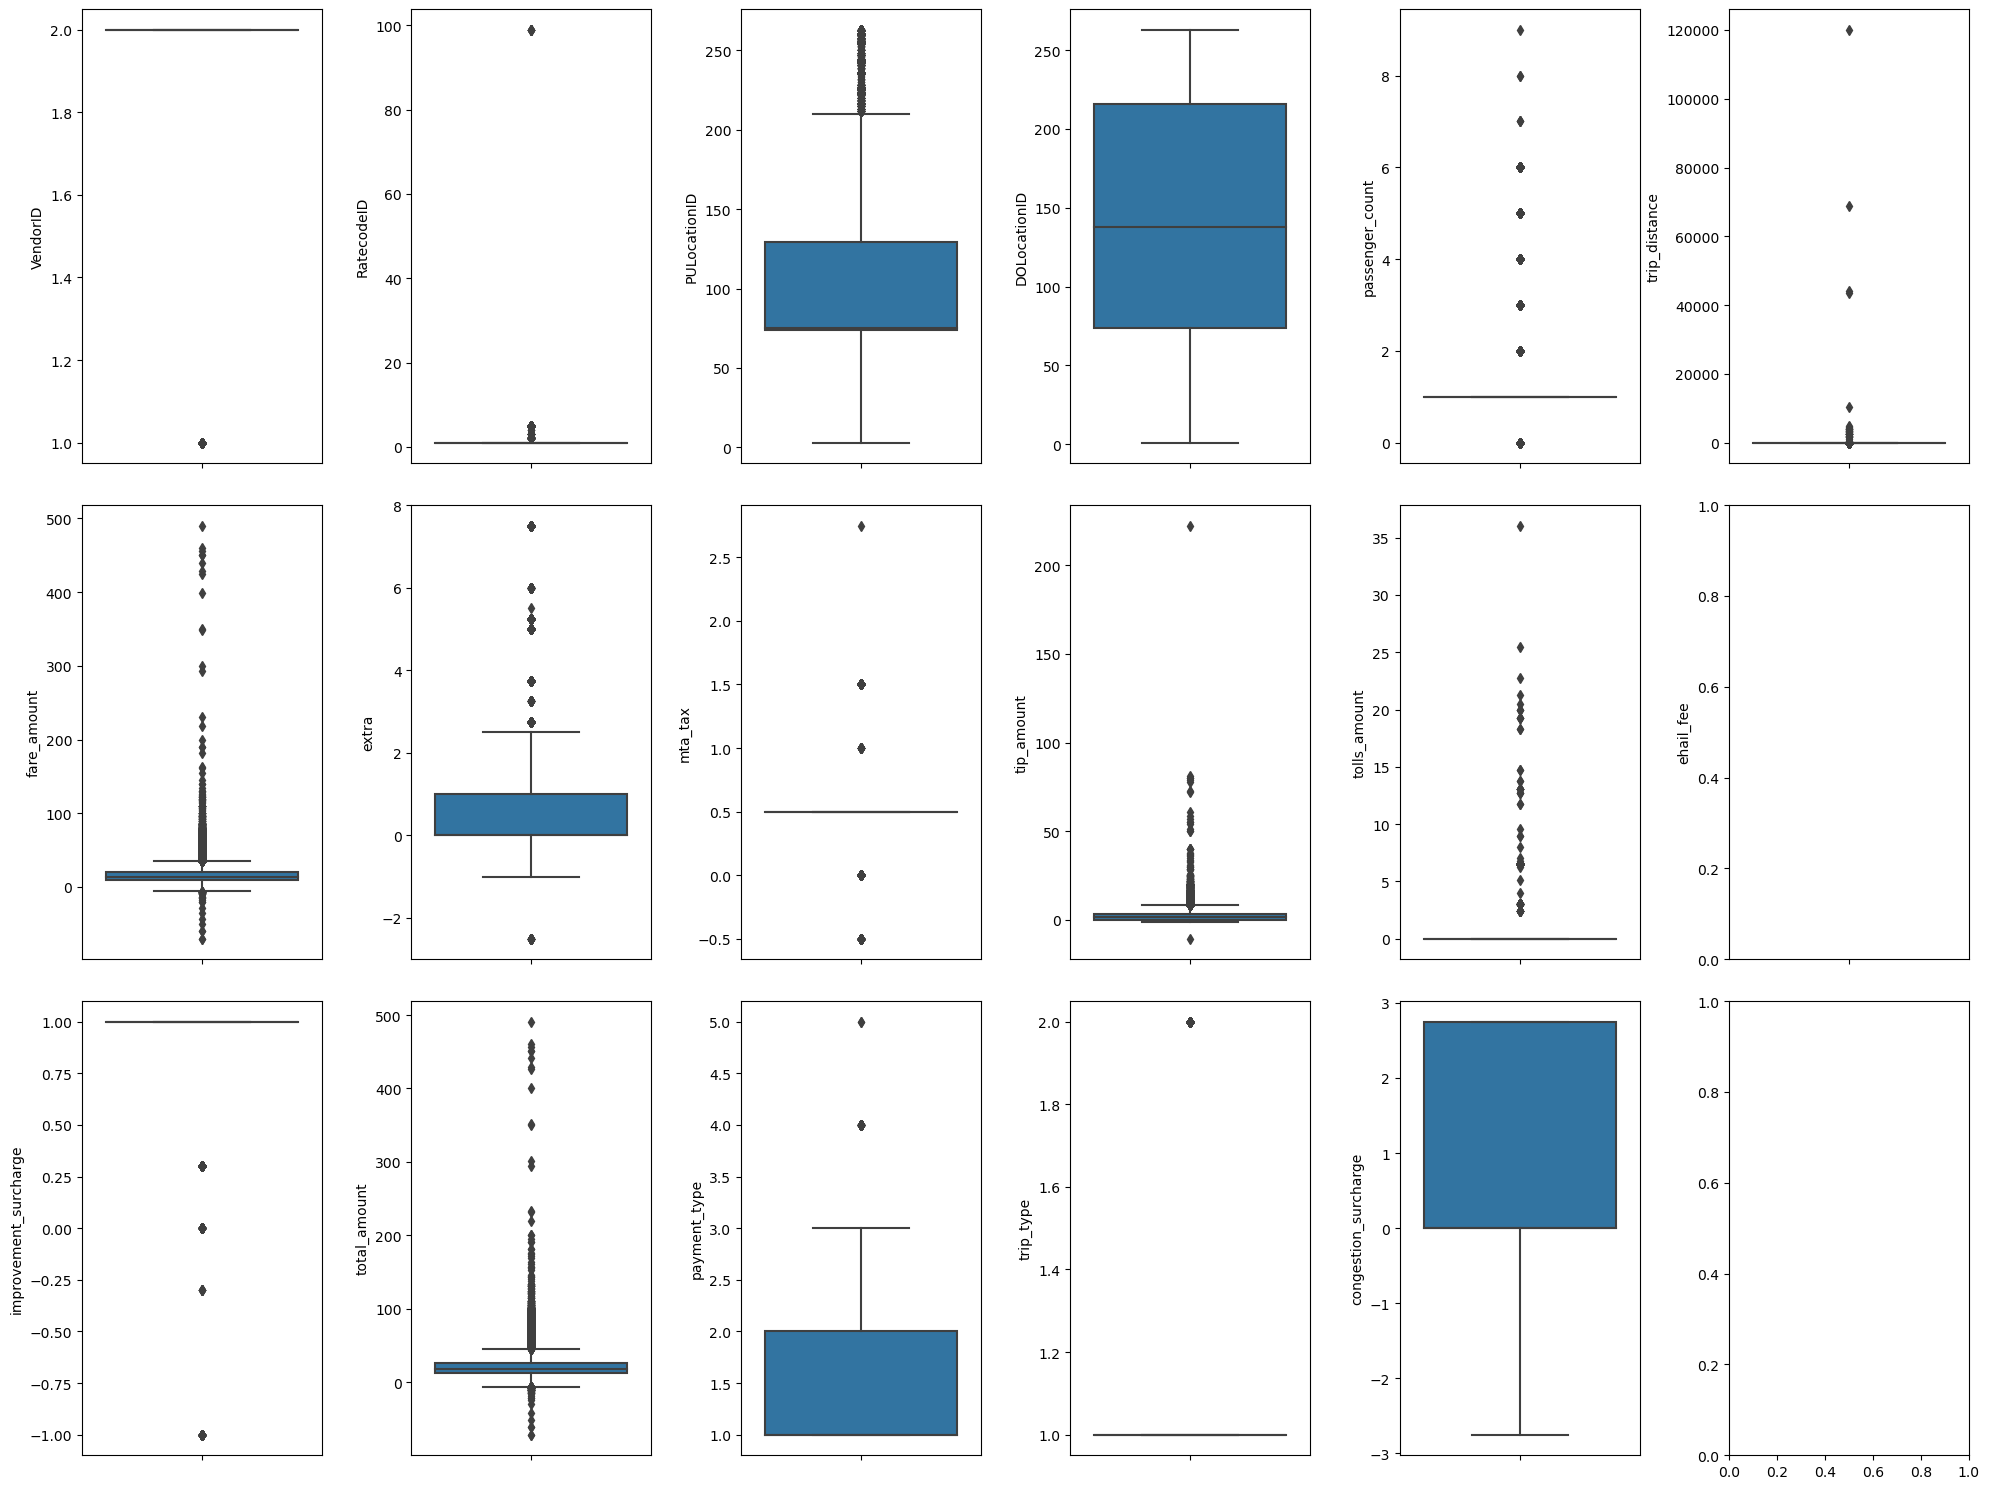

In [743]:
fig, axs = plt.subplots(ncols=6, nrows=3, figsize=(20,15))
index = 0
axs = axs.flatten()
for k, v in df.select_dtypes(include=[np.number]).items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(w_pad=0.5, h_pad=2)


<b> Insight Outliers </b>
- Berdasarkan boxplot di atas, dapat disimpulkan dataset terdapat banyak outliers dan tidak ada satupun yang terdistribusi normal. 


## Data Cleaning

### Check duplicate data

In [745]:
#check duplicate
df.duplicated().sum()

0

<b> Insight Duplicate Data </b>

* Dari hasil pengecekan code diatas dapat disimpulkan jika dataset ini tidak memiliki duplicate value didalamnya. Langkah selanjutnya adalah Drop column yang tidak digunakan.


### Drop unused column

In [746]:
#drop column vendor id, store_and_fwd_flag and ehail_fee
df.drop(['VendorID', 'store_and_fwd_flag', 'ehail_fee', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'passenger_count', 'fare_amount', 'RatecodeID', 'tip_amount', 'total_amount', 'payment_type', 'trip_type',], axis=1, inplace=True)
df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,trip_distance,PUBorough,DOBorough,PUZone,DOZone,PUservice_zone,DOservice_zone
0,2023-01-01 00:26:10,2023-01-01 00:37:11,166,143,2.58,Manhattan,Manhattan,Morningside Heights,Lincoln Square West,Boro Zone,Yellow Zone
1,2023-01-01 00:51:03,2023-01-01 00:57:49,24,43,1.81,Manhattan,Manhattan,Bloomingdale,Central Park,Yellow Zone,Yellow Zone
2,2023-01-01 00:35:12,2023-01-01 00:41:32,223,179,0.00,Queens,Queens,Steinway,Old Astoria,Boro Zone,Boro Zone
3,2023-01-01 00:13:14,2023-01-01 00:19:03,41,238,1.30,Manhattan,Manhattan,Central Harlem,Upper West Side North,Boro Zone,Yellow Zone
4,2023-01-01 00:33:04,2023-01-01 00:39:02,41,74,1.10,Manhattan,Manhattan,Central Harlem,East Harlem North,Boro Zone,Boro Zone


<b>Penjelasan</b> <br>
Mendrop kolom yang tidak digunakan untuk analisis data. dikarenakan pada analisis data ini hanya menggunakan kolom yang berisi informasi mengenai lokasi dan waktu saja.


In [747]:
df.describe()

,PULocationID,DOLocationID,trip_distance
count,67499.000000,67499.000000,67499.000000
mean,97.950681,137.221233,8.147393
std,60.580689,76.093424,588.183049
min,3.000000,1.000000,0.000000
25%,74.000000,74.000000,1.130000
50%,75.000000,138.000000,1.850000
75%,129.000000,216.000000,3.200000
max,263.000000,263.000000,120098.840000


### Handling Pickup and Dropoff Datetime

Pada tahap ini mengconvert lpep_pickup_datetime dan lpep_dropoff_datetime menjadi tipe data datetime. lalu mencari outliner pada kedua kolom tersebut. dan menghapus outliner tersebut. Dikarenakan hanya konsen pada bulan Januari 2023

In [748]:
#convert lpep_pickup_datetime and lpep_dropoff_datetime to datetime
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])
df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,trip_distance,PUBorough,DOBorough,PUZone,DOZone,PUservice_zone,DOservice_zone
0,2023-01-01 00:26:10,2023-01-01 00:37:11,166,143,2.58,Manhattan,Manhattan,Morningside Heights,Lincoln Square West,Boro Zone,Yellow Zone
1,2023-01-01 00:51:03,2023-01-01 00:57:49,24,43,1.81,Manhattan,Manhattan,Bloomingdale,Central Park,Yellow Zone,Yellow Zone
2,2023-01-01 00:35:12,2023-01-01 00:41:32,223,179,0.00,Queens,Queens,Steinway,Old Astoria,Boro Zone,Boro Zone
3,2023-01-01 00:13:14,2023-01-01 00:19:03,41,238,1.30,Manhattan,Manhattan,Central Harlem,Upper West Side North,Boro Zone,Yellow Zone
4,2023-01-01 00:33:04,2023-01-01 00:39:02,41,74,1.10,Manhattan,Manhattan,Central Harlem,East Harlem North,Boro Zone,Boro Zone


In [749]:
#jam pickup
df['PU_hour'] = df['lpep_pickup_datetime'].dt.hour


Membuat kolom baru yang berisi informasi mengenai waktu perjalanan yang akan digunakan untuk analisis data berdasarkan jam, hari, dan bulan.

In [750]:
#describe lpep_pickup_datetime and lpep_dropoff_datetime
df[['lpep_pickup_datetime', 'lpep_dropoff_datetime']].describe()

,lpep_pickup_datetime,lpep_dropoff_datetime
count,67499,67499
mean,2023-01-16 20:18:08.064756736,2023-01-16 20:36:10.317486080
min,2009-01-01 20:21:27,2009-01-02 11:07:31
25%,2023-01-09 12:21:44.500000,2023-01-09 12:37:31.500000
50%,2023-01-17 08:44:47,2023-01-17 09:00:08
75%,2023-01-24 15:54:20,2023-01-24 16:11:09
max,2023-02-01 03:10:05,2023-02-01 17:27:05


Insight Outliers
- Minimum pada lpep_pickup_datetime adalah 2009-01-01 dan maksimum pada lpep_pickup_datetime adalah 2023-02-01 Sehingga perlu dihapus.


In [751]:
#check outlier only 2023 january data
df[df['lpep_pickup_datetime'] < '2023-01-01']

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,trip_distance,PUBorough,DOBorough,PUZone,DOZone,PUservice_zone,DOservice_zone,PU_hour
298,2022-12-09 14:10:49,2022-12-09 14:22:26,7,56,5.37,Queens,Queens,Astoria,Corona,Boro Zone,Boro Zone,14
318,2022-12-09 14:55:42,2022-12-09 15:33:06,260,164,5.48,Queens,Manhattan,Woodside,Midtown South,Boro Zone,Yellow Zone,14
17874,2009-01-01 20:21:27,2009-01-02 11:07:31,65,178,7.72,Brooklyn,Brooklyn,Downtown Brooklyn/MetroTech,Ocean Parkway South,Boro Zone,Boro Zone,20


In [752]:
drop_index = df[df['lpep_pickup_datetime'] < '2023-01-01'].index
df.drop(drop_index, inplace=True)

In [753]:
df[df['lpep_pickup_datetime'] >= '2023-02-01']

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,trip_distance,PUBorough,DOBorough,PUZone,DOZone,PUservice_zone,DOservice_zone,PU_hour
25100,2023-02-01 03:10:05,2023-02-01 03:40:35,82,198,4.58,Queens,Queens,Elmhurst,Ridgewood,Boro Zone,Boro Zone,3


In [754]:
drop_index = df[df['lpep_pickup_datetime'] >= '2023-02-01'].index
df.drop(drop_index, inplace=True)

<b>Insight Outliers</b>
- Outliers melebihi 31 januari sudah dihapus

### Handling Trip Distance

In [755]:
df['trip_distance'].describe()

count     67495.000000
mean          8.147533
std         588.200478
min           0.000000
25%           1.130000
50%           1.850000
75%           3.200000
max      120098.840000
Name: trip_distance, dtype: float64

<b> Penjelasan </b> <br>
Terlihat banyak sekali outliers pada kolom trip_distance. sehingga perlu dihapus. dan terlihat juga terdapat nilai 0 pada kolom trip_distance. sehingga perlu di tangani. Maximal 120098.48 miles dan minimal 0 miles sangat tidak masuk akal.

<Axes: xlabel='trip_distance'>

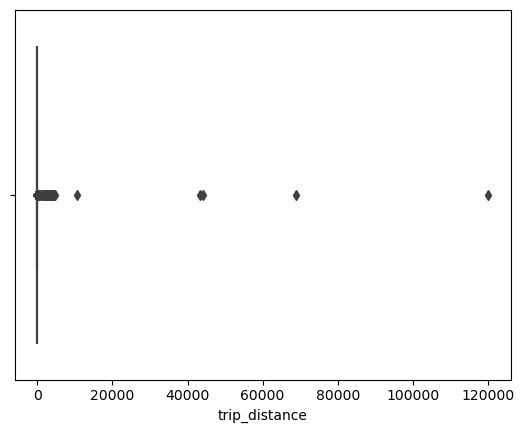

In [756]:
#box plot trip distance 
sns.boxplot(x=df['trip_distance'])

<b> Insight Outliers </b>
- Jika trip distance adalah 0 itu sangat tidak mungkin dikarenakan tidak ada perjalanan namun memiliki biaya.
- Jika trip distance adalah lebih dari 1000 itu sangat tidak mungkin
- Data sangat tidak normal dikarenakan ada Outliers sangat ekstrim


In [757]:
df['trip_duration'] = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']
df['trip_duration'] = df['trip_duration'].dt.total_seconds() / 60
df['trip_duration'] = df['trip_duration'].round(2)
display(df.head(), df.tail())

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,trip_distance,PUBorough,DOBorough,PUZone,DOZone,PUservice_zone,DOservice_zone,PU_hour,trip_duration
0,2023-01-01 00:26:10,2023-01-01 00:37:11,166,143,2.58,Manhattan,Manhattan,Morningside Heights,Lincoln Square West,Boro Zone,Yellow Zone,0,11.02
1,2023-01-01 00:51:03,2023-01-01 00:57:49,24,43,1.81,Manhattan,Manhattan,Bloomingdale,Central Park,Yellow Zone,Yellow Zone,0,6.77
2,2023-01-01 00:35:12,2023-01-01 00:41:32,223,179,0.00,Queens,Queens,Steinway,Old Astoria,Boro Zone,Boro Zone,0,6.33
3,2023-01-01 00:13:14,2023-01-01 00:19:03,41,238,1.30,Manhattan,Manhattan,Central Harlem,Upper West Side North,Boro Zone,Yellow Zone,0,5.82
4,2023-01-01 00:33:04,2023-01-01 00:39:02,41,74,1.10,Manhattan,Manhattan,Central Harlem,East Harlem North,Boro Zone,Boro Zone,0,5.97


,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,trip_distance,PUBorough,DOBorough,PUZone,DOZone,PUservice_zone,DOservice_zone,PU_hour,trip_duration
68206,2023-01-31 22:29:00,2023-01-31 22:42:00,49,62,4070.82,Brooklyn,Brooklyn,Clinton Hill,Crown Heights South,Boro Zone,Boro Zone,22,13.0
68207,2023-01-31 22:40:00,2023-01-31 22:48:00,10,205,2.14,Queens,Queens,Baisley Park,Saint Albans,Boro Zone,Boro Zone,22,8.0
68208,2023-01-31 23:46:00,2023-02-01 00:02:00,66,37,3.44,Brooklyn,Brooklyn,DUMBO/Vinegar Hill,Bushwick South,Boro Zone,Boro Zone,23,16.0
68209,2023-01-31 23:01:00,2023-01-31 23:19:00,225,189,3.03,Brooklyn,Brooklyn,Stuyvesant Heights,Prospect Heights,Boro Zone,Boro Zone,23,18.0
68210,2023-01-31 23:51:00,2023-02-01 00:07:00,256,140,5.82,Brooklyn,Manhattan,Williamsburg (South Side),Lenox Hill East,Boro Zone,Yellow Zone,23,16.0


- Membuat kolom baru yang berisi informasi mengenai waktu perjalanan yang akan digunakan untuk analisis dan mengeliminasi outliers data

In [758]:
rows_to_drop = df[df['trip_distance'] == 0.00].index
df = df.drop(index = rows_to_drop)
df.shape


(64503, 13)

In [759]:
def distance_level(row):
    if (row > 0) & (row <= 2):
        val = "short_trips"
    elif (row > 2) & (row <= 5):
        val = "medium_trips"
    elif (row > 5) & (row <= 46):
        val = "long_trips"
    else:
        val = "too_long_trips"
    return val

df['distance_level'] = df['trip_distance'].apply(distance_level)


- Short trip =  adalah perjalanan 0-2 mil hanya melewati beberapa blok saja
- Medium trip = adalah perjalanan 2-10 mil melewati beberapa blok dan beberapa zona saja
- Long trip = adalah perjalanan 5-6 Mil yang melewati borough dan zona 


In [760]:
too_long_trip = df[df['distance_level'] == 'too_long_trips']
too_long_trip.shape


(38, 14)

![Alt text](image.png)

Menghapus trip distance yang bernilai lebih dari 50 dikarenakan jarang sekali ada perjalanan yang melebihi 50 miles. Berdasarkan data gambar diatas dapat disimpulkan bahwa trip distance yang melebihi 45 miles adalah outliers. Itu merupakanan dari PUlocationid 259 ke doLocationid 44 kalau di intepretasikan adalah dari wakefield bronx ke Charleston/Tottenville	yang ada di staten island

In [761]:
rows_to_drop = df[df['distance_level'] == 'too_long_trips'].index
df = df.drop(index = rows_to_drop)
df.shape

(64465, 14)

In [762]:
# drop trip duration < 0.2 and < 1 minute
df[(df['trip_distance'] < 0.2) & (df['trip_duration'] < 1)]

df.drop(df[(df['trip_duration'] < 0.2) & (df['trip_duration'] < 1)].index, inplace=True)
df.shape

(64308, 14)

Menghapus trip distance yang bernilai kurang dari 0.2 miles dan trip duration kurang dari 1 menit dikarenakan jarang sekali ada perjalanan yang kurang dari 0.2 miles dan kurang dari 1 menit.

In [763]:
#search trip distance 0.1 - 0.2
bin_s = df[(df['trip_distance'] > 0.1) & (df['trip_distance'] < 0.2)]
df.drop(bin_s[bin_s['trip_duration'] > 7].index, inplace=True)
df.shape

(64297, 14)

Menghapus outlier yang tidak masuk akal seperti jarak cuma 0.2 miles tetapi trip duration lebih dari 7 menit.


5360

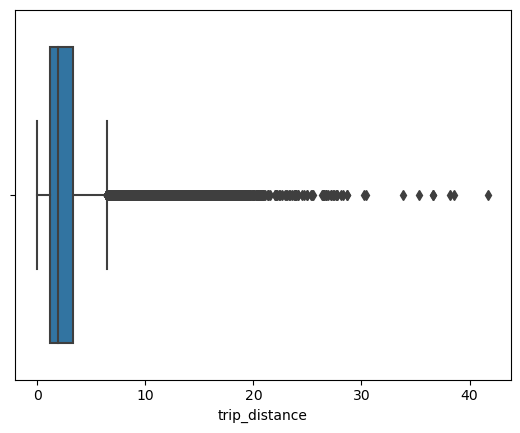

In [764]:
#boxplot trip distance
sns.boxplot(data = df, x = 'trip_distance')

def distance_outlier(df, col): 
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    return (df[col] < lower_bound) | (df[col] > upper_bound)

trip_distance_outlier = df[distance_outlier(df, 'trip_distance')]
len(trip_distance_outlier)


Bahkan setelah menghilangkan semua perjalanan yang terlalu lama, masih banyak outlier yang muncul. Hal ini menunjukkan bahwa sebaran jarak perjalanan tidak mengikuti sebaran normal. 


### Handling Trip Duration

Durasi perjalanan perjalanan taksi dapat bervariasi secara luas berdasarkan situasi khusus dari perjalanan tersebut, kondisi lalu lintas, jarak yang ditempuh, dan faktor lainnya. Di kota yang padat seperti New York City, durasi perjalanan dapat dipengaruhi oleh berbagai variabel termasuk jarak, kondisi lalu lintas, waktu dalam sehari, dan rute yang diambil.

Sementara tidak ada batas maksimum yang secara universal ditetapkan untuk durasi perjalanan taksi, penting untuk mempertimbangkan aspek praktis dari perjalanan taksi. Perjalanan taksi yang berlangsung beberapa jam mungkin menjadi indikasi kesalahan data, anomali, atau situasi yang tidak biasa.

Secara umum, perjalanan taksi yang berlangsung lebih dari beberapa jam bisa dianggap tidak biasa, terutama untuk jarak yang biasa ditempuh dalam lingkungan perkotaan. Durasi yang sangat lama mungkin disebabkan oleh hal-hal seperti:

- Kesalahan entri data dalam mencatat waktu penjemputan dan waktu kedatangan.
- Berhenti atau deviasi beberapa kali selama perjalanan.
- Pengemudi membiarkan penghitung tarif berjalan setelah perjalanan selesai.
- Perjalanan yang melibatkan perjalanan antara lokasi yang jauh di luar kota.


In [765]:
#describe trip duration
df['trip_duration'].describe()

count    64297.000000
mean        17.991485
std         74.789618
min          0.200000
25%          7.420000
50%         11.430000
75%         17.250000
max       1438.930000
Name: trip_duration, dtype: float64

<b> Insight Outliers </b>
- Maksimal trip duration adalah 1438 menit itu tidak masuk akal maka perlu dihandling


In [766]:
#hapus trip duration > 180 menit
df.drop(df[df['trip_duration'] > 180].index, inplace=True)
df.shape

(64050, 14)

Berdasarkan gambar maksimum durasi adalah 180 menit atau 3 jam. Jika lebih dari 3 jam maka akan dihapus.

<Axes: xlabel='trip_duration'>

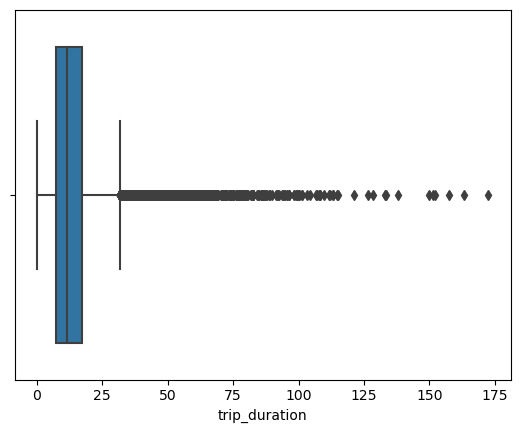

In [767]:
#boxplot trip duration

sns.boxplot(data = df, x = 'trip_duration')

In [768]:
df.shape

(64050, 14)

In [769]:
df.isna().sum()


lpep_pickup_datetime     0
lpep_dropoff_datetime    0
PULocationID             0
DOLocationID             0
trip_distance            0
PUBorough                0
DOBorough                0
PUZone                   0
DOZone                   0
PUservice_zone           0
DOservice_zone           0
PU_hour                  0
trip_duration            0
distance_level           0
dtype: int64

<Axes: >

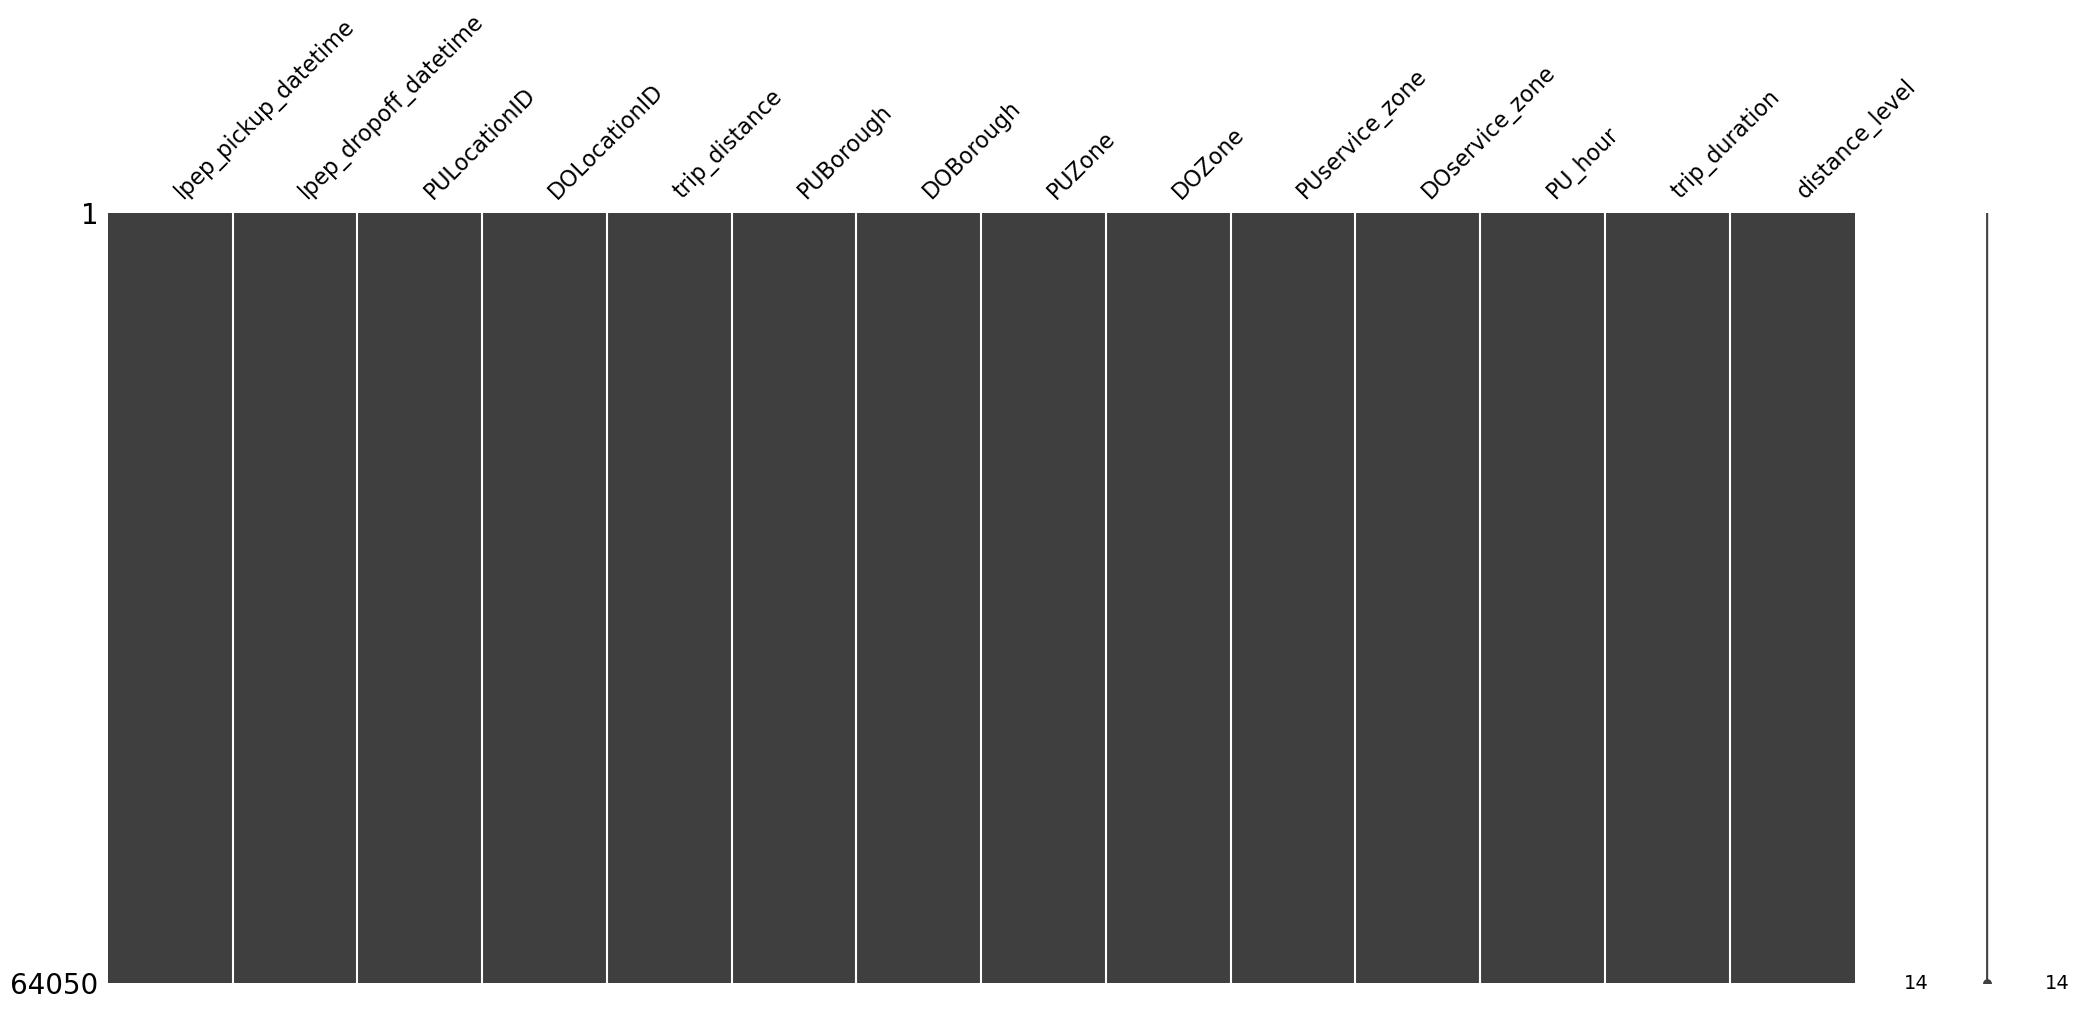

In [770]:
msno.matrix(df)


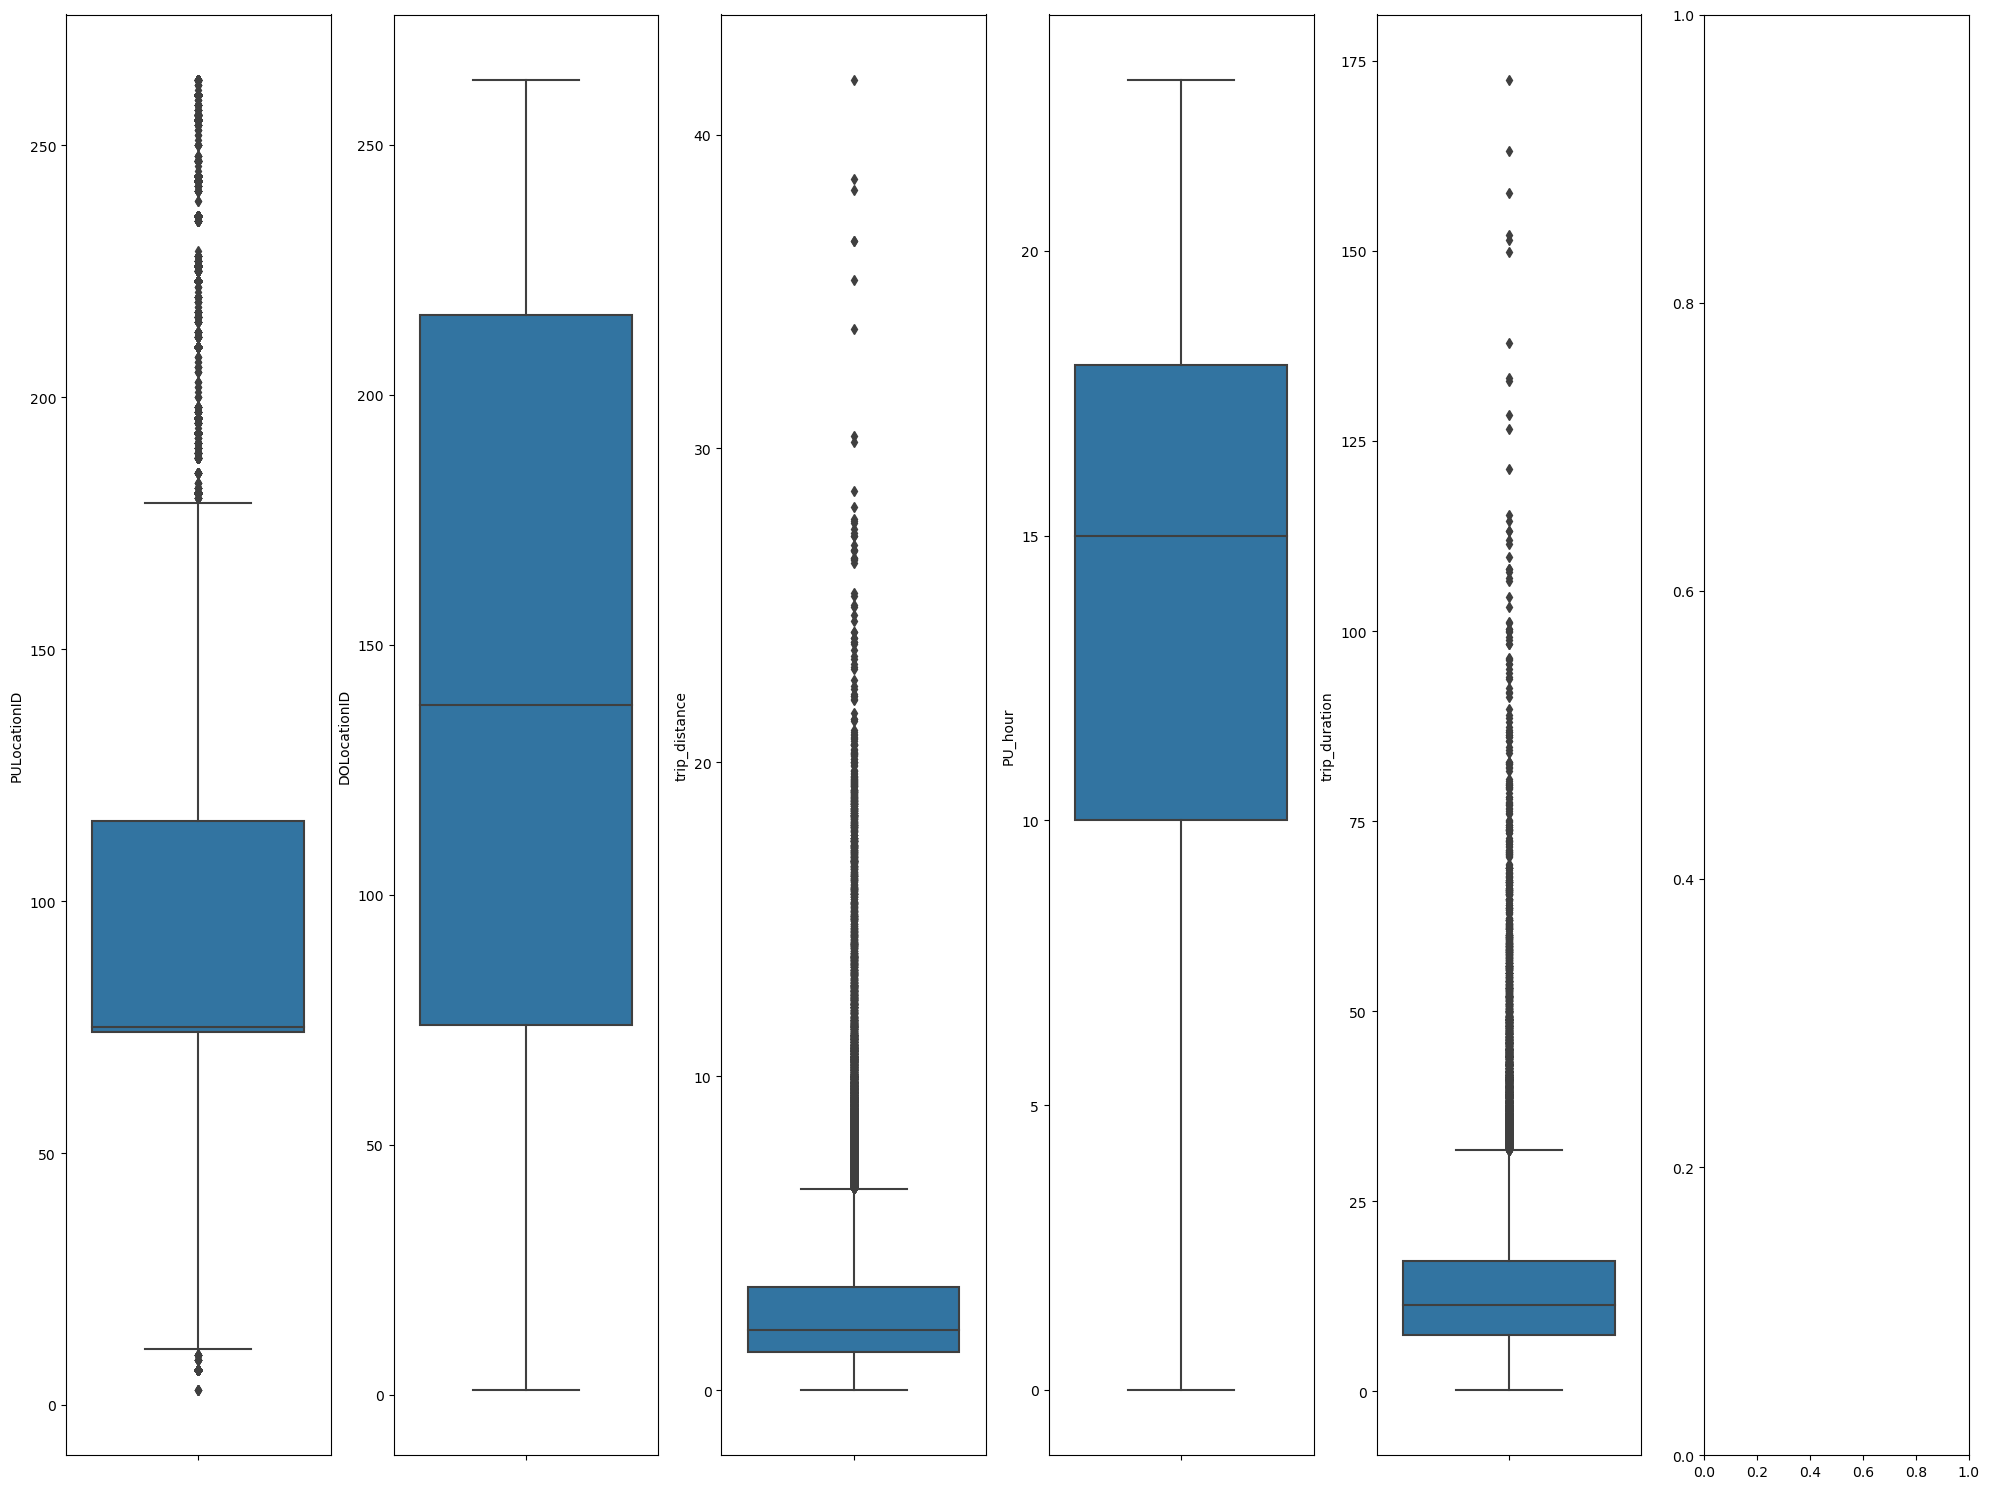

In [771]:
#visualize data distribution with boxplot
fig, axs = plt.subplots(ncols=6, nrows=1, figsize=(20,15))
index = 0
axs = axs.flatten()
for k, v in df.select_dtypes(include=[np.number]).items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(w_pad=0.5, h_pad=2)



## Data Wrangling

In [772]:
df.shape

(64050, 14)

### Mengkatogerikan waktu

In [773]:
# membuat kolom baru membagi waktu menjadi midnight, morning, afternoon, evening, night
# df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
# df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])


def time_of_day(x):
    if x.hour < 6:
        return 'midnight'
    elif 6 <= x.hour < 12:
        return 'morning'
    elif 12 <= x.hour < 18:
        return 'afternoon'
    elif 18 <= x.hour < 24:
        return 'evening'
    else:
        return 'night'

df['PU_time_of_day'] = df['lpep_pickup_datetime'].apply(time_of_day)
df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,trip_distance,PUBorough,DOBorough,PUZone,DOZone,PUservice_zone,DOservice_zone,PU_hour,trip_duration,distance_level,PU_time_of_day
0,2023-01-01 00:26:10,2023-01-01 00:37:11,166,143,2.58,Manhattan,Manhattan,Morningside Heights,Lincoln Square West,Boro Zone,Yellow Zone,0,11.02,medium_trips,midnight
1,2023-01-01 00:51:03,2023-01-01 00:57:49,24,43,1.81,Manhattan,Manhattan,Bloomingdale,Central Park,Yellow Zone,Yellow Zone,0,6.77,short_trips,midnight
3,2023-01-01 00:13:14,2023-01-01 00:19:03,41,238,1.30,Manhattan,Manhattan,Central Harlem,Upper West Side North,Boro Zone,Yellow Zone,0,5.82,short_trips,midnight
4,2023-01-01 00:33:04,2023-01-01 00:39:02,41,74,1.10,Manhattan,Manhattan,Central Harlem,East Harlem North,Boro Zone,Boro Zone,0,5.97,short_trips,midnight
5,2023-01-01 00:53:31,2023-01-01 01:11:04,41,262,2.78,Manhattan,Manhattan,Central Harlem,Yorkville East,Boro Zone,Yellow Zone,0,17.55,medium_trips,midnight


Membua kolom baru berdasarkan jam dan membaginya menjadi 4 kategori yaitu:
- 00:00 - 06:00 = midnight
- 06:00 - 12:00 = morning
- 12:00 - 18:00 = afternoon
- 18:00 - 00:00 = evening


### Mengkatogerikan hari
Mengklasifikasikan tanggal menjadi hari yaitu monday, tuesday, wednesday, thursday, friday, saturday, dan sunday. 

In [774]:
#klasifikasi hari 

def day_of_week(x):
    if x.weekday() == 0:
        return 'monday'
    elif x.weekday() == 1:
        return 'tuesday'
    elif x.weekday() == 2:
        return 'wednesday'
    elif x.weekday() == 3:
        return 'thursday'
    elif x.weekday() == 4:
        return 'friday'
    elif x.weekday() == 5:
        return 'saturday'
    else:
        return 'sunday'
    
df['PU_day'] = df['lpep_pickup_datetime'].apply(day_of_week)


### Mengkatogerikan weekend dan weekday
Mengklasifikasikan weekend dan weekday. weekend adalah saturday dan sunday. weekday adalah monday, tuesday, wednesday, thursday, dan friday.


In [775]:
def weekend(x):
    if x.weekday() == 5 or x.weekday() == 6:
        return 'weekend'
    else:
        return 'weekday'

df['PU_category_week'] = df['lpep_pickup_datetime'].apply(weekend)

### Klasifikasi Minggu
Mengklasifikasikan bulan menjadi 5 kategori minggu yaitu:<br>
- week_1 = 1 - 7 <br>
- week_2 = 8 - 14 <br>
- week_3 = 15 - 21 <br>
- week_4 = 22 - 28 <br>
- week_5 = 29 - 31 <br>


In [776]:
#split based week 1,2,3,4,5
def pu_week(x):
    if x.day <= 7:
        return 'week_1'
    elif 7 < x.day <= 14:
        return 'week_2'
    elif 14 < x.day <= 21:
        return 'week_3'
    elif 21 < x.day <= 28:
        return 'week_4'
    else:
        return 'week_5'
    
df['PU_week'] = df['lpep_pickup_datetime'].apply(week)


In [777]:
#make pu_date
df['PU_date'] = df['lpep_pickup_datetime'].dt.strftime('%d')


In [778]:
df.describe()

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,trip_distance,PU_hour,trip_duration
count,64050,64050,64050.000000,64050.000000,64050.000000,64050.000000,64050.000000
mean,2023-01-16 22:34:43.702950912,2023-01-16 22:48:23.453567488,97.174036,137.651772,2.769553,13.876347,13.662521
min,2023-01-01 00:01:31,2023-01-01 00:13:26,3.000000,1.000000,0.010000,0.000000,0.200000
25%,2023-01-09 12:32:51.500000,2023-01-09 12:41:12.249999872,74.000000,74.000000,1.220000,10.000000,7.400000
50%,2023-01-17 09:14:52.500000,2023-01-17 09:29:12,75.000000,138.000000,1.930000,15.000000,11.400000
75%,2023-01-24 16:05:46.750000128,2023-01-24 16:18:57,116.000000,216.000000,3.300000,18.000000,17.130000
max,2023-01-31 23:58:23,2023-02-01 00:31:14,263.000000,263.000000,41.740000,23.000000,172.480000
std,NaN,NaN,59.804106,76.179888,2.630690,5.203562,9.635515


### Mengganti nama kolom date

In [779]:
#change lpep_pickup_datetime and lpep_dropoff_datetime to datetime
df['pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

df.drop(['lpep_pickup_datetime', 'lpep_dropoff_datetime'], axis=1, inplace=True)

In [780]:
df.drop(['PULocationID', 'DOLocationID'], axis=1, inplace=True)


In [781]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64050 entries, 0 to 68210
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   trip_distance     64050 non-null  float64       
 1   PUBorough         64050 non-null  object        
 2   DOBorough         64050 non-null  object        
 3   PUZone            64050 non-null  object        
 4   DOZone            64050 non-null  object        
 5   PUservice_zone    64050 non-null  object        
 6   DOservice_zone    64050 non-null  object        
 7   PU_hour           64050 non-null  int32         
 8   trip_duration     64050 non-null  float64       
 9   distance_level    64050 non-null  object        
 10  PU_time_of_day    64050 non-null  object        
 11  PU_day            64050 non-null  object        
 12  PU_category_week  64050 non-null  object        
 13  PU_week           64050 non-null  object        
 14  PU_date           64050 non

In [782]:
df.head() 

,trip_distance,PUBorough,DOBorough,PUZone,DOZone,PUservice_zone,DOservice_zone,PU_hour,trip_duration,distance_level,PU_time_of_day,PU_day,PU_category_week,PU_week,PU_date,pickup_datetime,dropoff_datetime
0,2.58,Manhattan,Manhattan,Morningside Heights,Lincoln Square West,Boro Zone,Yellow Zone,0,11.02,medium_trips,midnight,sunday,weekend,week_1,01,2023-01-01 00:26:10,2023-01-01 00:37:11
1,1.81,Manhattan,Manhattan,Bloomingdale,Central Park,Yellow Zone,Yellow Zone,0,6.77,short_trips,midnight,sunday,weekend,week_1,01,2023-01-01 00:51:03,2023-01-01 00:57:49
3,1.30,Manhattan,Manhattan,Central Harlem,Upper West Side North,Boro Zone,Yellow Zone,0,5.82,short_trips,midnight,sunday,weekend,week_1,01,2023-01-01 00:13:14,2023-01-01 00:19:03
4,1.10,Manhattan,Manhattan,Central Harlem,East Harlem North,Boro Zone,Boro Zone,0,5.97,short_trips,midnight,sunday,weekend,week_1,01,2023-01-01 00:33:04,2023-01-01 00:39:02
5,2.78,Manhattan,Manhattan,Central Harlem,Yorkville East,Boro Zone,Yellow Zone,0,17.55,medium_trips,midnight,sunday,weekend,week_1,01,2023-01-01 00:53:31,2023-01-01 01:11:04


### Mengurutkan kolom   

In [783]:
#rearrange columns
df = df[['pickup_datetime', 'dropoff_datetime', 'PU_hour', 'PU_time_of_day', 'PU_day', 'PU_category_week', 'PU_week', 'trip_distance','distance_level', 'trip_duration','PU_date', 'PUBorough', 'PUZone', 'PUservice_zone', 'DOBorough', 'DOZone', 'DOservice_zone']]


In [784]:
df

,pickup_datetime,dropoff_datetime,PU_hour,PU_time_of_day,PU_day,PU_category_week,PU_week,trip_distance,distance_level,trip_duration,PU_date,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
0,2023-01-01 00:26:10,2023-01-01 00:37:11,0,midnight,sunday,weekend,week_1,2.58,medium_trips,11.02,01,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2023-01-01 00:51:03,2023-01-01 00:57:49,0,midnight,sunday,weekend,week_1,1.81,short_trips,6.77,01,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
3,2023-01-01 00:13:14,2023-01-01 00:19:03,0,midnight,sunday,weekend,week_1,1.30,short_trips,5.82,01,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,2023-01-01 00:33:04,2023-01-01 00:39:02,0,midnight,sunday,weekend,week_1,1.10,short_trips,5.97,01,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone
5,2023-01-01 00:53:31,2023-01-01 01:11:04,0,midnight,sunday,weekend,week_1,2.78,medium_trips,17.55,01,Manhattan,Central Harlem,Boro Zone,Manhattan,Yorkville East,Yellow Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68205,2023-01-31 21:56:00,2023-01-31 22:14:00,21,evening,tuesday,weekday,week_5,3.92,medium_trips,18.00,31,Manhattan,East Harlem South,Boro Zone,Manhattan,Penn Station/Madison Sq West,Yellow Zone
68207,2023-01-31 22:40:00,2023-01-31 22:48:00,22,evening,tuesday,weekday,week_5,2.14,medium_trips,8.00,31,Queens,Baisley Park,Boro Zone,Queens,Saint Albans,Boro Zone
68208,2023-01-31 23:46:00,2023-02-01 00:02:00,23,evening,tuesday,weekday,week_5,3.44,medium_trips,16.00,31,Brooklyn,DUMBO/Vinegar Hill,Boro Zone,Brooklyn,Bushwick South,Boro Zone
68209,2023-01-31 23:01:00,2023-01-31 23:19:00,23,evening,tuesday,weekday,week_5,3.03,medium_trips,18.00,31,Brooklyn,Stuyvesant Heights,Boro Zone,Brooklyn,Prospect Heights,Boro Zone


In [785]:
#convert to csv

df.to_csv('cleaned_data2.csv', index=False)

#convert to excel

df.to_excel('cleaned_data2.xlsx', index=False)